In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [22]:
df=pd.read_csv('bill_authentication.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


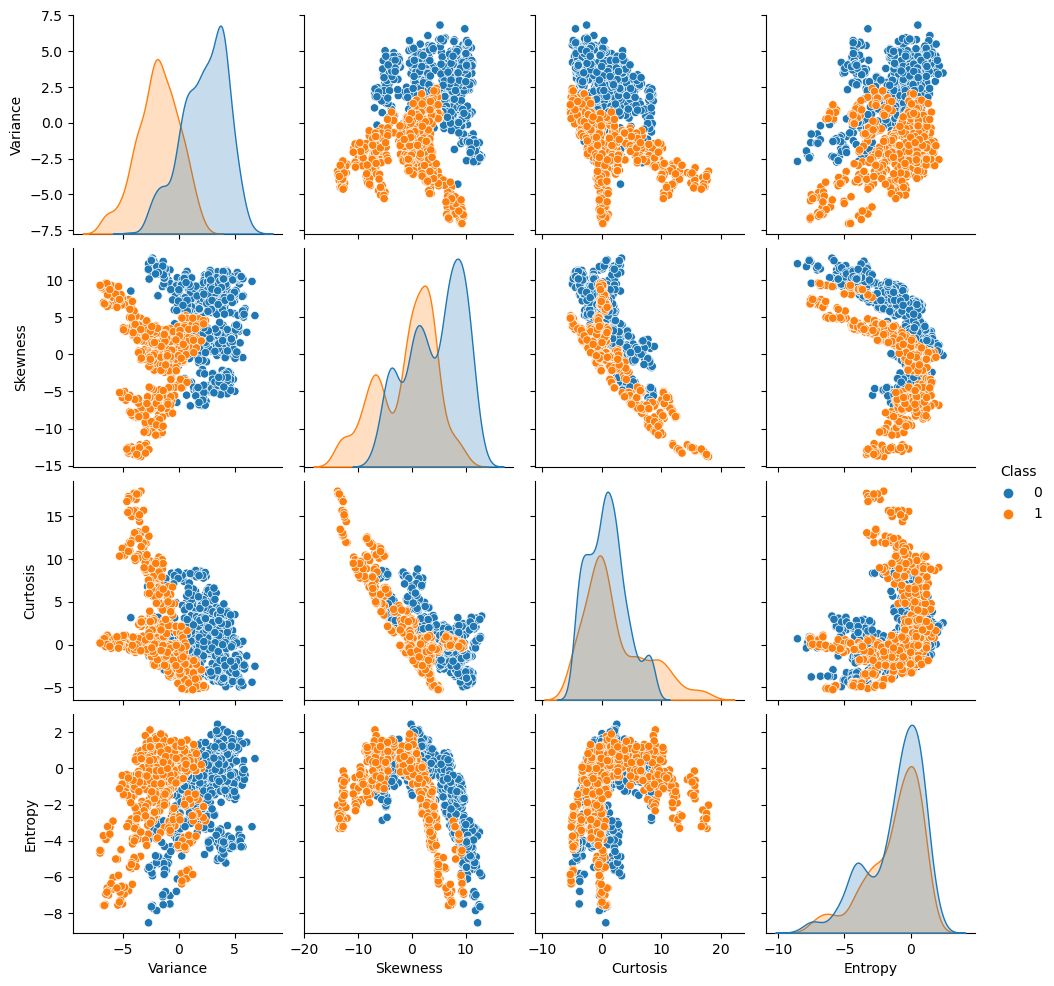

In [23]:
sns.pairplot(df,hue='Class')

<Axes: >

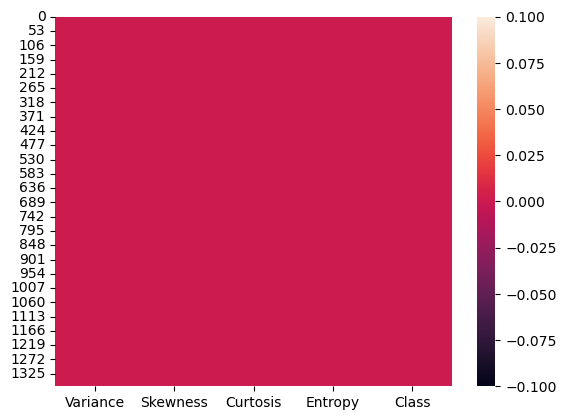

In [24]:
sns.heatmap(df.isnull())

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X=df.drop('Class',axis=1)
y=df['Class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtree=DecisionTreeClassifier()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
pred=dtree.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[255   2]
 [  6 190]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       257
           1       0.99      0.97      0.98       196

    accuracy                           0.98       453
   macro avg       0.98      0.98      0.98       453
weighted avg       0.98      0.98      0.98       453



In [35]:
from sklearn import tree
d=dtree

[Text(0.46484375, 0.9375, 'x[0] <= -0.017\ngini = 0.495\nsamples = 919\nvalue = [505, 414]'),
 Text(0.28515625, 0.8125, 'x[1] <= 1.005\ngini = 0.298\nsamples = 450\nvalue = [82, 368]'),
 Text(0.1796875, 0.6875, 'x[0] <= -0.317\ngini = 0.143\nsamples = 387\nvalue = [30, 357]'),
 Text(0.0625, 0.5625, 'x[2] <= 1.089\ngini = 0.066\nsamples = 321\nvalue = [11, 310]'),
 Text(0.03125, 0.4375, 'gini = 0.0\nsamples = 216\nvalue = [0, 216]'),
 Text(0.09375, 0.4375, 'x[1] <= -1.093\ngini = 0.188\nsamples = 105\nvalue = [11, 94]'),
 Text(0.0625, 0.3125, 'gini = 0.0\nsamples = 93\nvalue = [0, 93]'),
 Text(0.125, 0.3125, 'x[0] <= -0.868\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.09375, 0.1875, 'x[1] <= -0.54\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0625, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.125, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15625, 0.1875, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.296875, 0.5625, 'x[2] <= -0.281

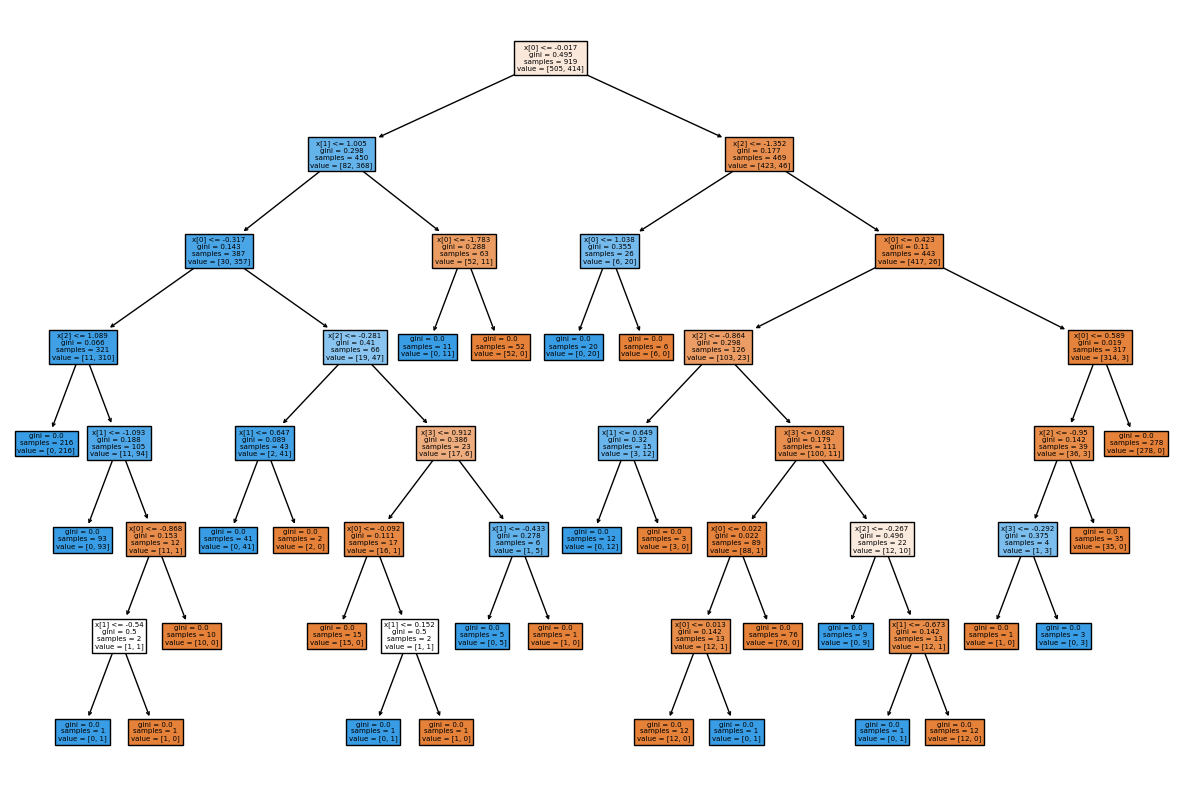

In [36]:
plt.figure(figsize=(15,10))
tree.plot_tree(d,filled=True)

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc=RandomForestClassifier(n_estimators=300)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [40]:
pred_rfc=rfc.predict(X_test)

In [41]:
print(confusion_matrix(y_test,pred_rfc))
print('\n')
print(classification_report(y_test,pred_rfc))

[[257   0]
 [  3 193]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       257
           1       1.00      0.98      0.99       196

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453

